## 서울시 행정동별 거주인구 EDA

In [2]:
"""NO 필드명 필드내용 비 고
1 STD_YM 기준년월
2 ADMI_CD 행정동코드 8자리
3 ADMI_NM 행정동명
4 SEXDSTN_CD 성별_코드 (1 : 남성, 2 : 여성)
5 AGRDE_CD 연령대_코드
6 RSPOP_CNT 거주인구_수
7 CTY_NM 시군구명"""

'NO 필드명 필드내용 비 고\n1 STD_YM 기준년월\n2 ADMI_CD 행정동코드 8자리\n3 ADMI_NM 행정동명\n4 SEXDSTN_CD 성별_코드 (1 : 남성, 2 : 여성)\n5 AGRDE_CD 연령대_코드\n6 RSPOP_CNT 거주인구_수\n7 CTY_NM 시군구명'

In [31]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

### 데이터 로드 및 불필요한 특수문자(백틱) 제거

In [32]:
data = pd.read_csv('./서울시 행정동별 거주인구.csv')

In [33]:
# 컬럼명에서 백틱 제외
data.columns =[re.sub('[`]', '', i) for i in data.columns.to_list()]

# 본문에서 백틱 제외
for column in data.columns:
    data[column] = data[column].apply(lambda x : re.sub('[`]', '', x))

In [34]:
data.head(2)

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
0,202306,11290600,안암동,1,0004,174,성북구
1,202306,11230720,휘경1동,1,0004,326,동대문구


In [35]:
# 거주인구 integer로 형 변환
data['RSPOP_CNT'] = data['RSPOP_CNT'].astype('int')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17724 entries, 0 to 17723
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STD_YM      17724 non-null  object
 1   ADMI_CD     17724 non-null  object
 2   ADMI_NM     17724 non-null  object
 3   SEXDSTN_CD  17724 non-null  object
 4   AGRDE_CD    17724 non-null  object
 5   RSPOP_CNT   17724 non-null  int32 
 6   CTY_NM      17724 non-null  object
dtypes: int32(1), object(6)
memory usage: 900.2+ KB


In [38]:
len(data['ADMI_NM'].unique())

421

### 행정동, 법정동 전처리 
화곡 1동, 화곡 2동 -> 화곡동으로 바꾸고 인구 합치기

In [22]:
# 동이름에서 숫자 제외하기
kor_str = [re.sub(r"[^ㄱ-ㅣ가-힣\s]", "",i )for i in data['ADMI_NM']]
data['ADMI_NM'] = kor_str

In [23]:
# 숫자가 제외된 동이름으로 묶고, 인구수 집계 
df = data.groupby(['CTY_NM', 'ADMI_NM','SEXDSTN_CD', 'AGRDE_CD'])['RSPOP_CNT'].sum().to_frame()
df.reset_index(inplace=True)
df

,CTY_NM,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT
0,강남구,개포동,1,0004,2232
1,강남구,개포동,1,0509,3392
2,강남구,개포동,1,1014,3984
3,강남구,개포동,1,1519,3710
4,강남구,개포동,1,2024,3880
...,...,...,...,...,...
10201,중랑구,중화동,2,8084,1390
10202,중랑구,중화동,2,8589,684
10203,중랑구,중화동,2,9094,188
10204,중랑구,중화동,2,9599,46


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10206 entries, 0 to 10205
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CTY_NM      10206 non-null  object
 1   ADMI_NM     10206 non-null  object
 2   SEXDSTN_CD  10206 non-null  object
 3   AGRDE_CD    10206 non-null  object
 4   RSPOP_CNT   10206 non-null  int32 
dtypes: int32(1), object(4)
memory usage: 358.9+ KB


In [43]:
print('행정구역 동 통합 이후 개수:', len(df['ADMI_NM'].unique()), '개')

행정구역 동 통합 이후 개수: 240 개


In [25]:
# 막대 그래프 그리는 함수 설정
def plot_bar(data, xlabel, ylabel, title):
    plt.rc('font', family='Malgun Gothic')
    plt.bar(x=data.index, height=data.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# 구별 거주 인구 합계(내림차순)
df.groupby('CTY_NM').sum()['RSPOP_CNT'].sort_values(ascending=False).head(10)

CTY_NM
송파구    1314202
강서구    1133678
강남구    1040140
노원구    1000208
관악구     974384
은평구     926596
양천구     876706
성북구     858284
강동구     815494
서초구     808968
Name: RSPOP_CNT, dtype: int32

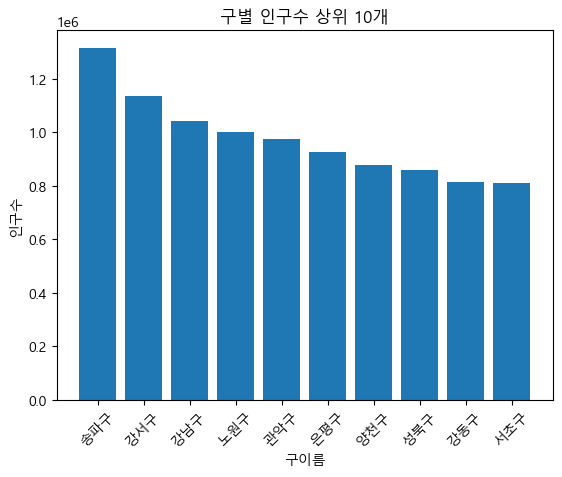

In [28]:
plot_bar(df.groupby('CTY_NM').sum()['RSPOP_CNT'].sort_values(ascending=False).head(10), '구이름', '인구수', '구별 인구수 상위 10개')

In [29]:
# 동별 거주 인구 합계(내림차순)
df.groupby(['CTY_NM', 'ADMI_NM']).sum()['RSPOP_CNT'].sort_values(ascending=False).head(10)

CTY_NM  ADMI_NM
노원구     상계동        393652
양천구     신정동        346162
강서구     화곡동        317708
양천구     목동         291540
동작구     상도동        248214
양천구     신월동        239004
송파구     잠실동        232176
도봉구     창동         231768
구로구     구로동        230018
서초구     서초동        218956
Name: RSPOP_CNT, dtype: int32

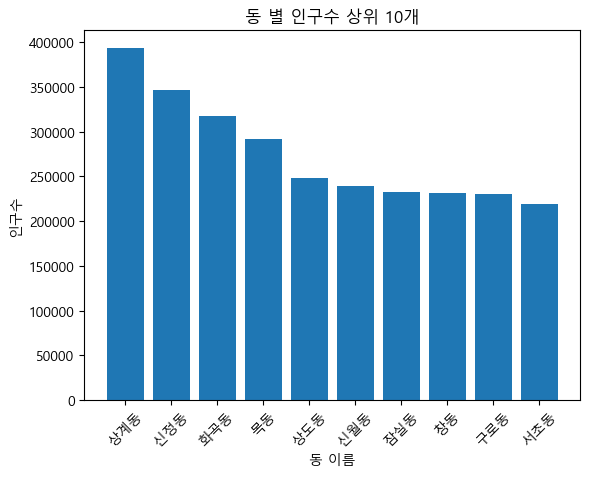

In [48]:
plot_bar(df.groupby(['ADMI_NM']).sum()['RSPOP_CNT'].sort_values(ascending=False).head(10), '동 이름', '인구수', '동 별 인구수 상위 10개')

In [78]:
# 동별 거주 인구 합계(내림차순)_ 동 통합 이전
data.groupby(['CTY_NM', 'ADMI_NM']).sum()['RSPOP_CNT'].sort_values(ascending=False).head(10)

CTY_NM  ADMI_NM
은평구     진관동        109356
강서구     화곡1동       103224
양천구     신정3동       100026
금천구     독산1동        92664
강동구     길동          89616
송파구     위례동         89344
동작구     상도1동        88674
은평구     역촌동         88564
강남구     세곡동         88410
강서구     우장산동        87492
Name: RSPOP_CNT, dtype: int32

In [54]:
# 동별 거주 인구 남성 인구 합계(내림차순)
df[df['SEXDSTN_CD'] == '1'].groupby(['CTY_NM', 'ADMI_NM'])['RSPOP_CNT'].sum().sort_values(ascending=False).head(10)

CTY_NM  ADMI_NM
노원구     상계동        188282
양천구     신정동        167894
강서구     화곡동        153464
양천구     목동         141620
동작구     상도동        119696
양천구     신월동        118832
구로구     구로동        113768
도봉구     창동         111756
송파구     잠실동        110476
서초구     서초동        105018
Name: RSPOP_CNT, dtype: int32

In [56]:
# 동별 거주 인구 남성 인구 합계(내림차순)_동 통합 이전
data[data['SEXDSTN_CD'] == '1'].groupby(['CTY_NM', 'ADMI_NM'])['RSPOP_CNT'].sum().sort_values(ascending=False).head(10)

CTY_NM  ADMI_NM
은평구     진관동        51004
강서구     화곡1동       50186
양천구     신정3동       48376
금천구     독산1동       47224
강동구     길동         43700
송파구     위례동        43536
동작구     상도1동       43062
강서구     우장산동       41824
은평구     역촌동        41572
강남구     세곡동        41426
Name: RSPOP_CNT, dtype: int32

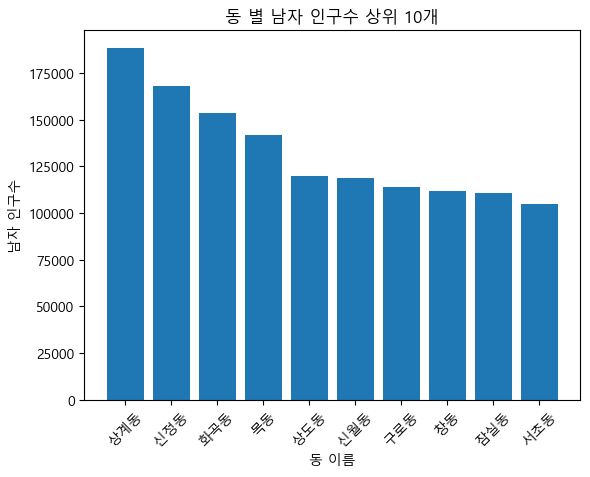

In [55]:
plot_bar(df[df['SEXDSTN_CD'] == '1'].groupby(['ADMI_NM'])['RSPOP_CNT'].sum().sort_values(ascending=False).head(10), '동 이름', '남자 인구수', '동 별 남자 인구수 상위 10개')

In [59]:
# 동별 거주 인구 여성 인구 합계
df[df['SEXDSTN_CD'] == '2'].groupby(['CTY_NM', 'ADMI_NM'])['RSPOP_CNT'].sum().sort_values(ascending=False).nlargest(10)

CTY_NM  ADMI_NM
노원구     상계동        205370
양천구     신정동        178268
강서구     화곡동        164244
양천구     목동         149920
동작구     상도동        128518
송파구     잠실동        121700
양천구     신월동        120172
도봉구     창동         120012
구로구     구로동        116250
서초구     서초동        113938
Name: RSPOP_CNT, dtype: int32

In [60]:
# 동별 거주 인구 여성 인구 합계
data[data['SEXDSTN_CD'] == '2'].groupby(['CTY_NM', 'ADMI_NM'])['RSPOP_CNT'].sum().sort_values(ascending=False).nlargest(10)

CTY_NM  ADMI_NM
은평구     진관동        58352
강서구     화곡1동       53038
양천구     신정3동       51650
은평구     역촌동        46992
강남구     세곡동        46984
강동구     길동         45916
송파구     위례동        45808
강서구     우장산동       45668
동작구     상도1동       45612
금천구     독산1동       45440
Name: RSPOP_CNT, dtype: int32

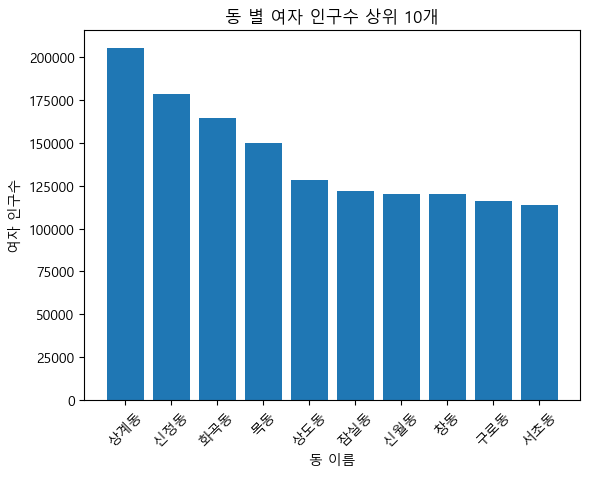

In [58]:
plot_bar(df[df['SEXDSTN_CD'] == '2'].groupby(['ADMI_NM'])['RSPOP_CNT'].sum().sort_values(ascending=False).head(10), '동 이름', '여자 인구수', '동 별 여자 인구수 상위 10개')